In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## import the library 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf

2024-07-16 04:11:41.426869: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 04:11:41.427036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 04:11:41.653592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# EDA

In [4]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train= train.drop('Id', axis=1)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
import warnings
warnings.filterwarnings('ignore')

## Data Visualization

In [10]:
na_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
n_miss = train[na_columns].isnull().sum().sort_values(ascending=False)
ratio = (train[na_columns].isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)
missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
missing_df

,n_miss,ratio
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


<Axes: xlabel='n_miss'>

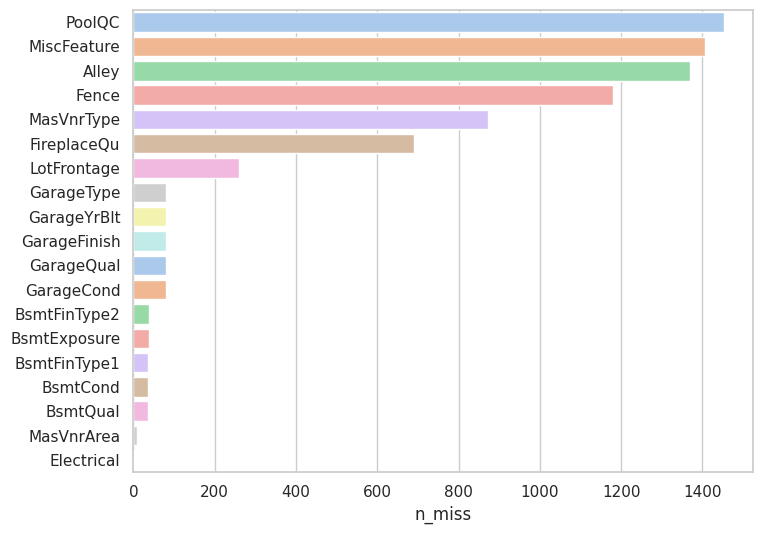

In [11]:
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(y=missing_df.index, x=missing_df['n_miss'], palette="pastel")

<Axes: xlabel='SalePrice', ylabel='Density'>

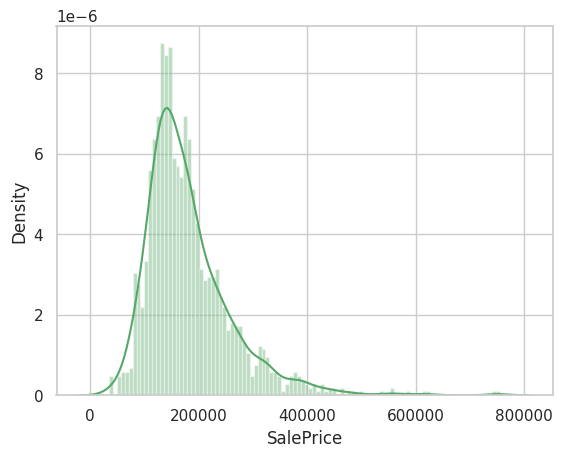

In [12]:
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

<Axes: ylabel='SalePrice'>

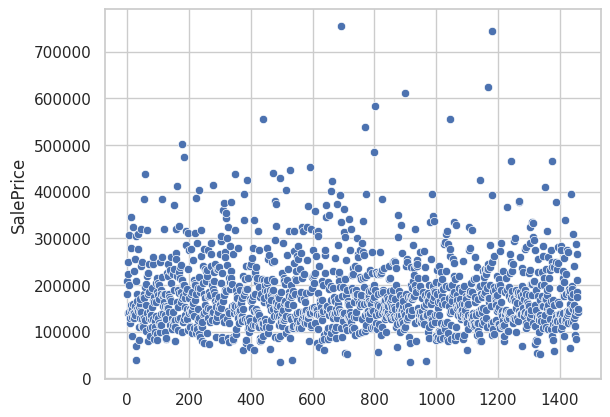

In [13]:
sns.scatterplot(train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

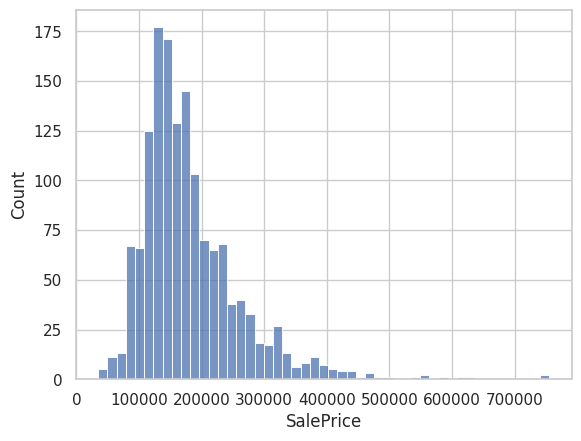

In [14]:
sns.histplot(train['SalePrice'])

Deviate from the normal distribution

Have appreciable positive skewness

In [15]:
train['SalePrice'].skew()

1.8828757597682129

In [16]:
train['SalePrice'].kurt()

6.536281860064529

In [17]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [18]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


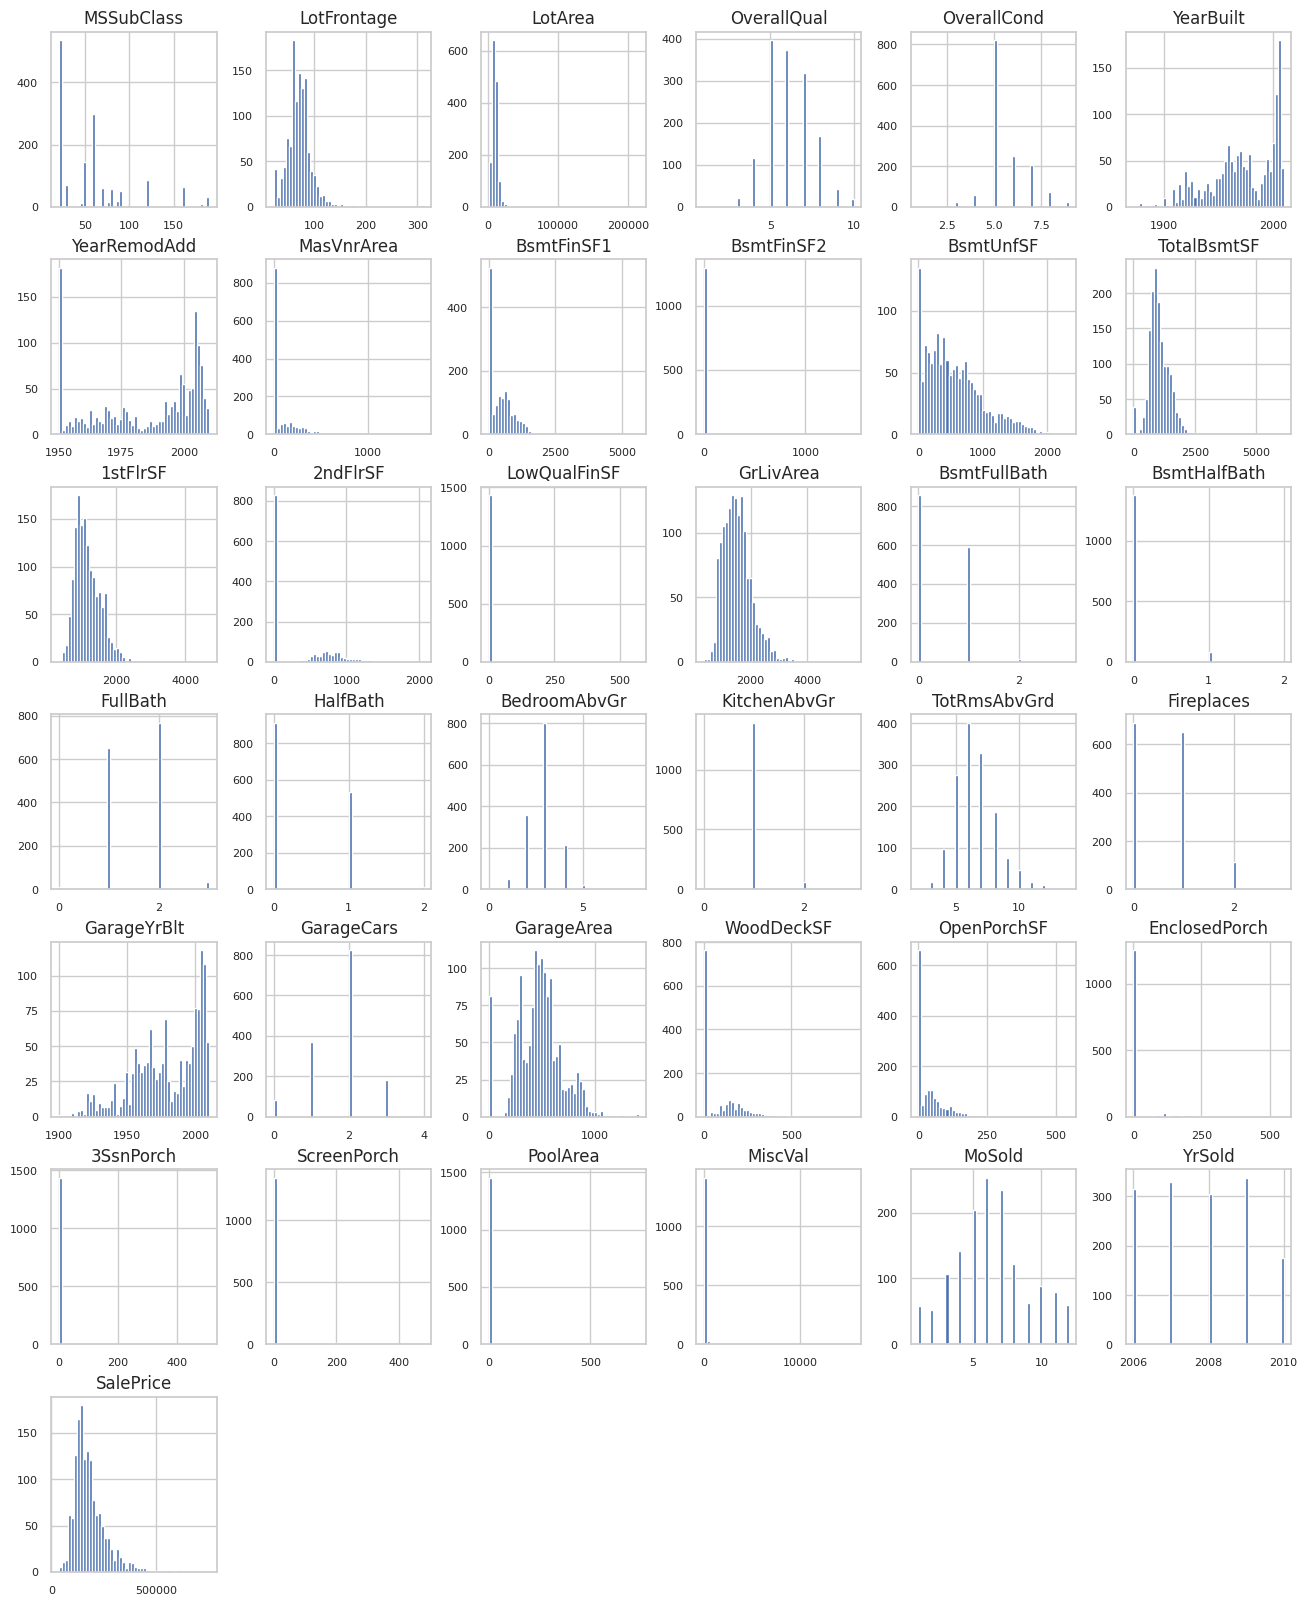

In [19]:
k=df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

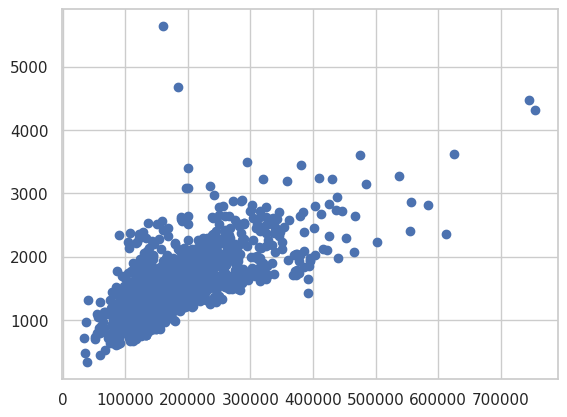

In [20]:
plt.scatter(df_num['SalePrice'],df_num['GrLivArea'])

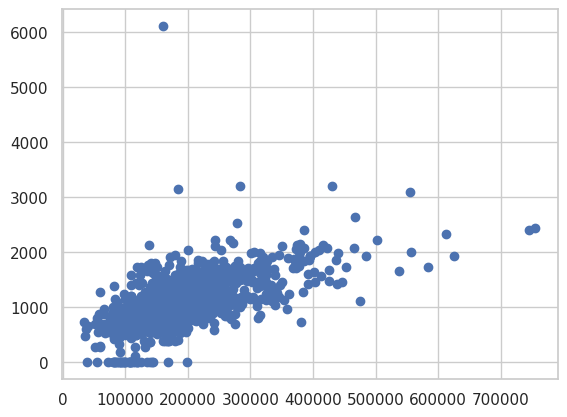

In [21]:
plt.scatter(df_num['SalePrice'],df_num['TotalBsmtSF'])

**'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases**

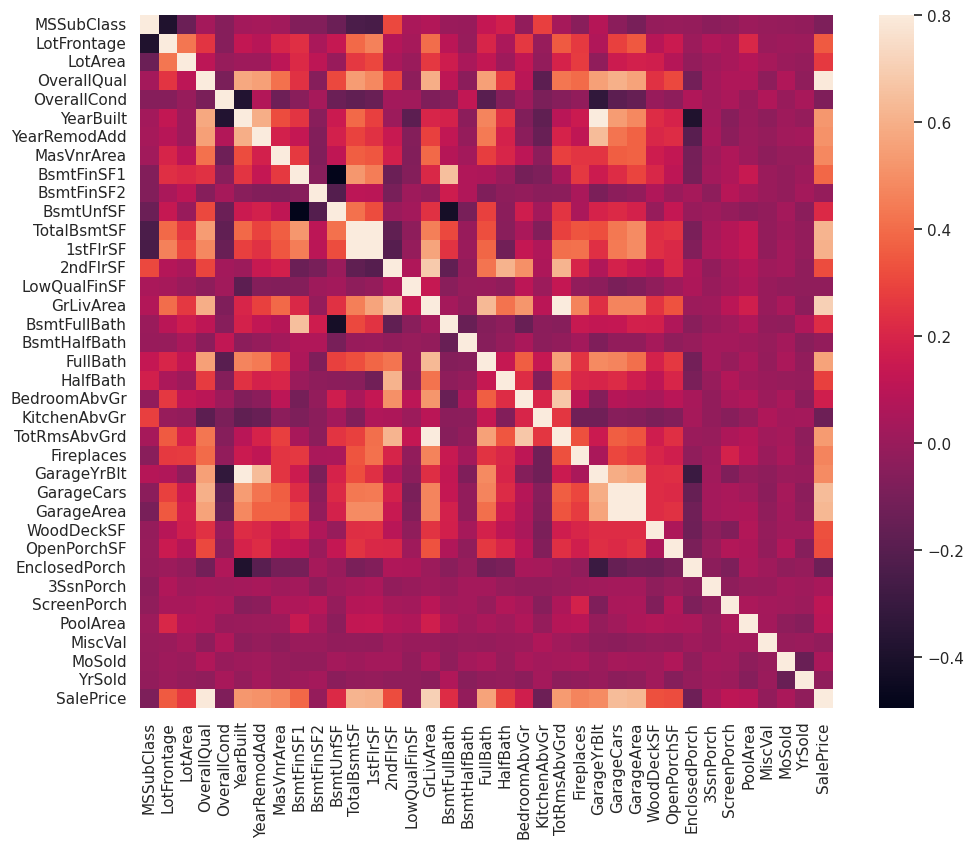

In [22]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_num.corr() ,vmax=.8, square=True);

**The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageYrBlt' and 'Garagecars' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity** 

**The variables 'OverallQual' and 'GrLivArea' are strongly correlated with the 'SalePrice' of houses.**

In [23]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
corr_fea=df_num.corr().nlargest(10, 'SalePrice')['SalePrice']
corr_fea

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [25]:
cols=df_num.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [26]:
k=train[cols].values.T
np.corrcoef(k)

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

<Axes: >

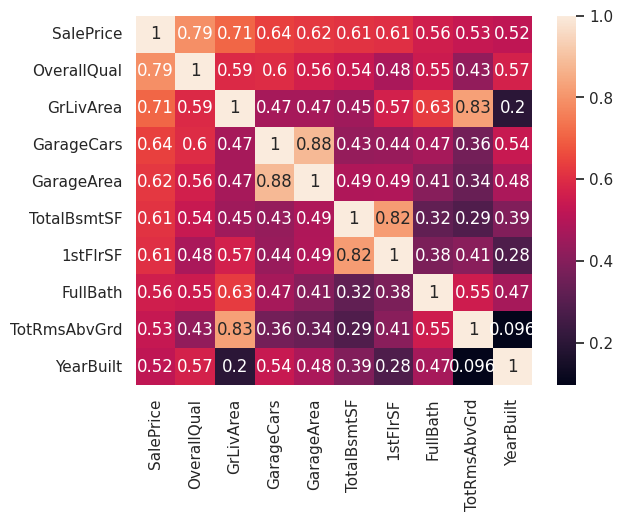

In [27]:
sns.heatmap(df_num[cols].corr(),annot=True)

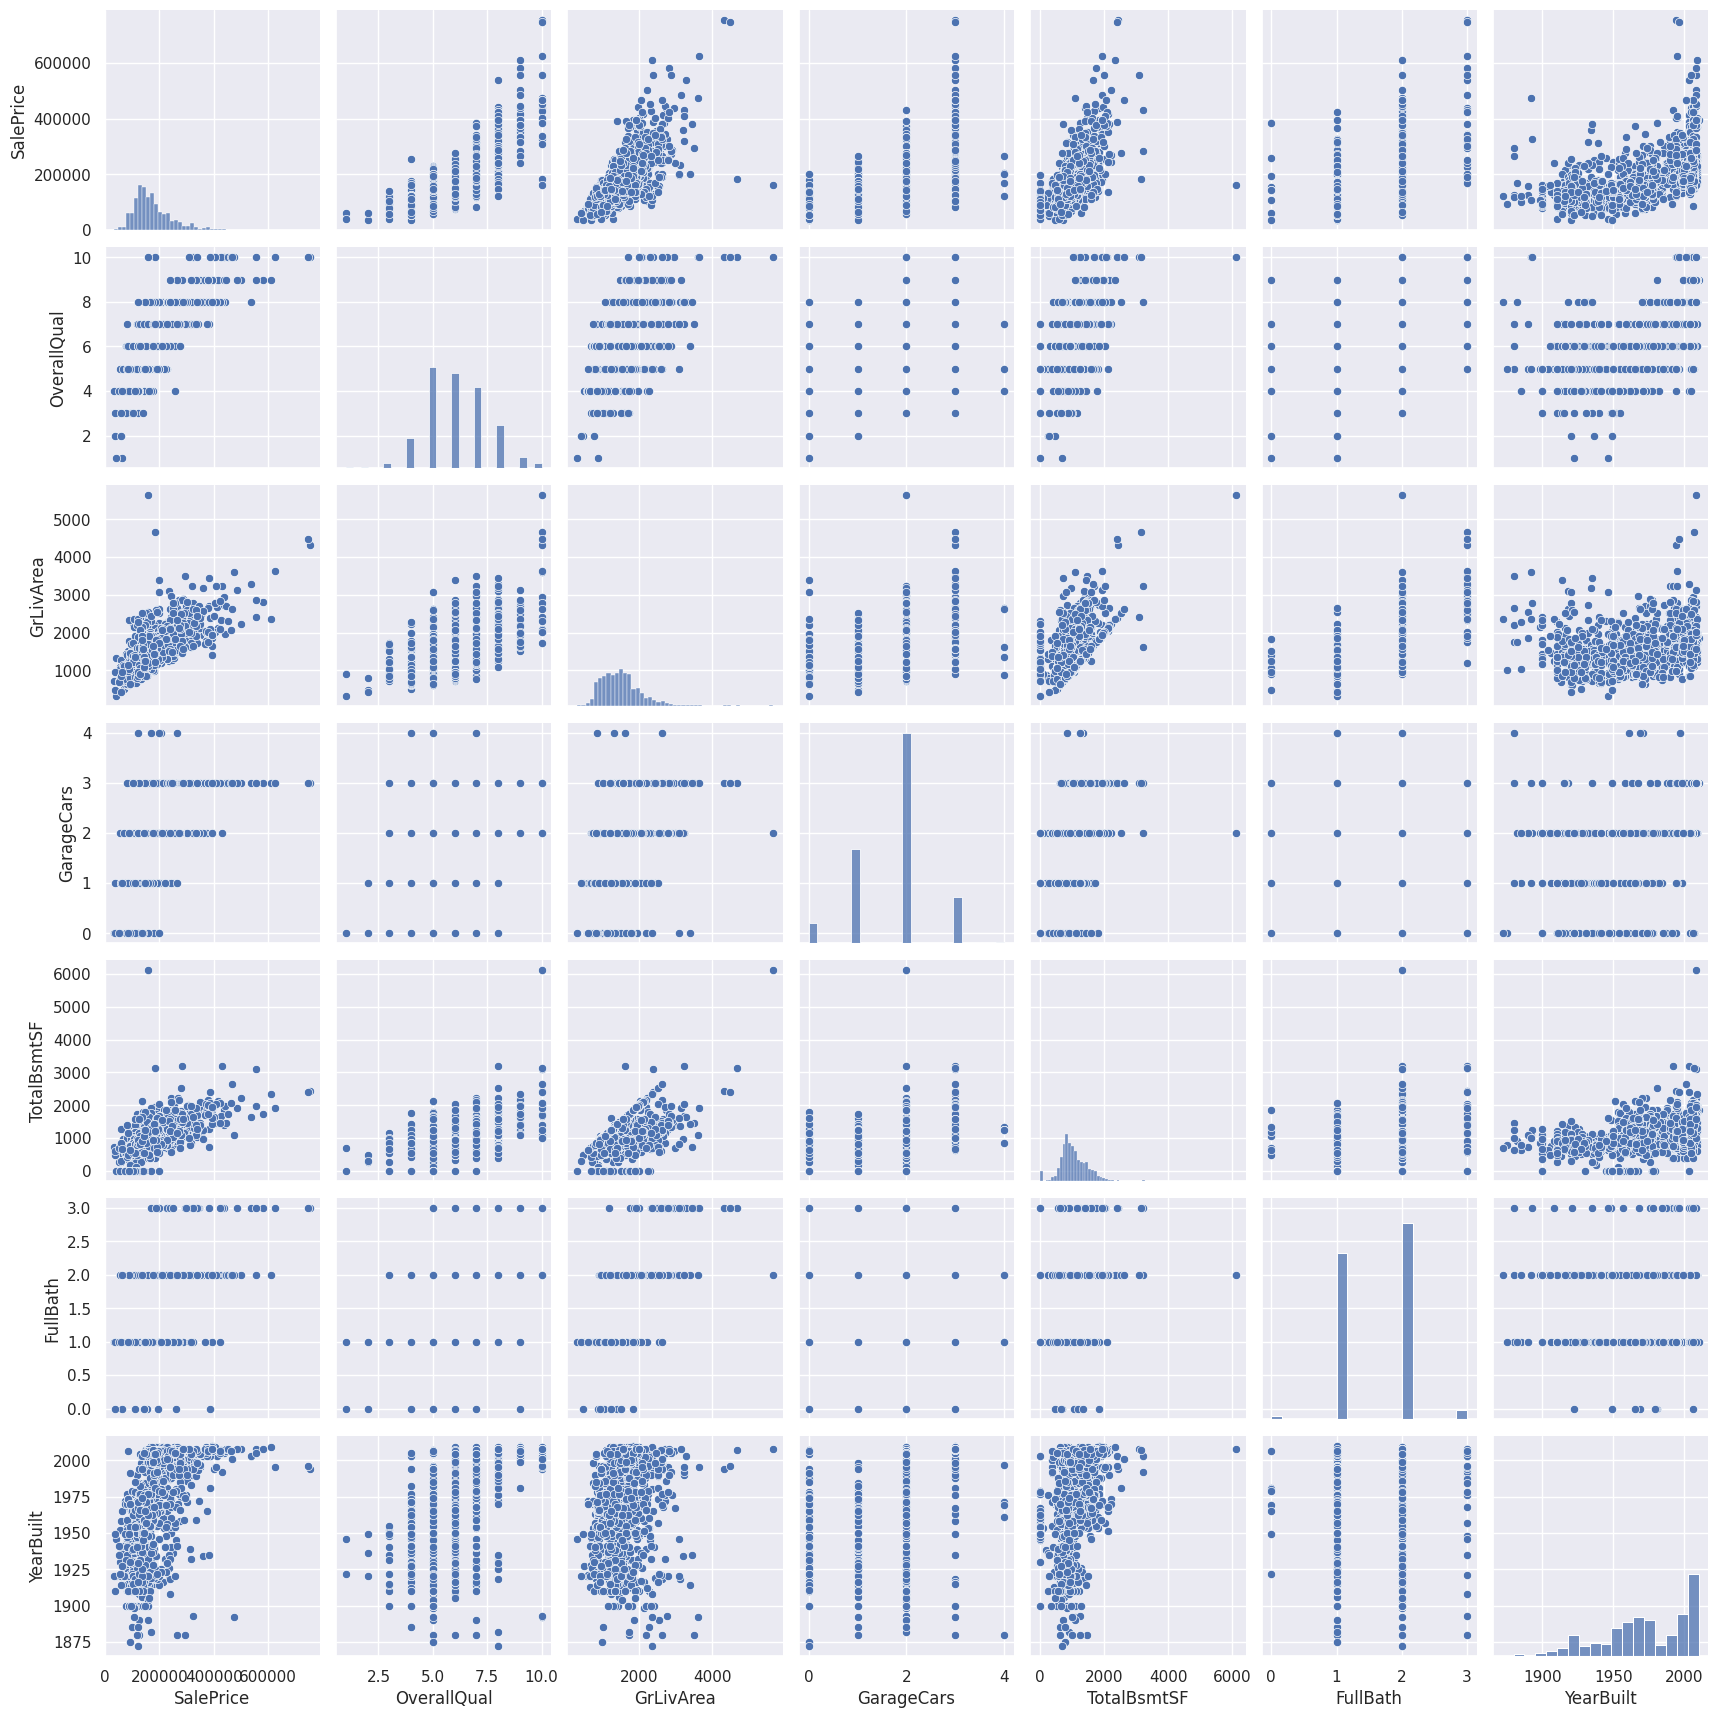

In [28]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)

## Handling Missing Data

In [29]:
train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [30]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


# TensorFlow Decision Tree(TFDF) model

In [31]:

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1011 examples in training, 449 examples in testing.


**We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset**

In [32]:
train_ds_pd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


**by default the Random Forest Model is configured to train classification tasks. Since this is a regression problem, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here**

In [33]:
label = 'SalePrice'
train_all= tfdf.keras.pd_dataframe_to_tf_dataset(train, label=label, task = tfdf.keras.Task.REGRESSION)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [34]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

### How can I configure them?
TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

> rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)

## Train the model

In [35]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1",\
                                  task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpo_yg06z8 as temporary training directory


In [36]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:08.617735. Found 1011 examples.
Training model...


[INFO 24-07-16 04:12:55.6902 UTC kernel.cc:1233] Loading model from path /tmp/tmpo_yg06z8/model/ with prefix 2c06b40b09ef4fd6


Model trained in 0:00:08.430130
Compiling model...


[INFO 24-07-16 04:12:56.2461 UTC decision_forest.cc:660] Model loaded with 300 root(s), 96272 node(s), and 74 input feature(s).
[INFO 24-07-16 04:12:56.2462 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-07-16 04:12:56.2463 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


## Visualize the model

In [37]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [38]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1011, accuracy=None, loss=None, rmse=28205.76448498759, ndcg=None, aucs=None, auuc=None, qini=None)

In [39]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - mse: 1329490944.0000
loss: 0.0000
mse: 1329490944.0000


In [40]:
for importance in inspector.variable_importances().keys():
  print("\t", importance)

	 NUM_AS_ROOT
	 NUM_NODES
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


In [41]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 78.0),
 ("ExterQual" (4; #22), 34.0),
 ("1stFlrSF" (1; #0), 23.0),
 ("GarageCars" (1; #32), 20.0),
 ("GrLivArea" (1; #38), 17.0),
 ("BsmtFinSF1" (1; #8), 13.0),
 ("EnclosedPorch" (1; #20), 12.0),
 ("3SsnPorch" (1; #2), 10.0),
 ("LotArea" (1; #47), 10.0),
 ("GarageArea" (1; #31), 8.0),
 ("LotFrontage" (1; #49), 8.0),
 ("BsmtHalfBath" (1; #13), 7.0),
 ("FullBath" (1; #29), 7.0),
 ("GarageYrBlt" (1; #37), 7.0),
 ("KitchenAbvGr" (1; #43), 7.0),
 ("YearBuilt" (1; #76), 7.0),
 ("BsmtFinSF2" (1; #9), 6.0),
 ("Fireplaces" (1; #27), 6.0),
 ("KitchenQual" (4; #44), 3.0),
 ("OpenPorchSF" (1; #60), 3.0),
 ("TotalBsmtSF" (1; #73), 3.0),
 ("BsmtQual" (4; #14), 2.0),
 ("BsmtUnfSF" (1; #15), 2.0),
 ("LowQualFinSF" (1; #51), 2.0),
 ("TotRmsAbvGrd" (1; #72), 2.0),
 ("BedroomAbvGr" (1; #4), 1.0),
 ("MasVnrArea" (1; #54), 1.0),
 ("MiscVal" (1; #57), 1.0)]

In [42]:
rf_all = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1",\
                                  task = tfdf.keras.Task.REGRESSION)
rf_all.compile(metrics=["mse"])   # training with whole model
rf_all.fit(x=train_all)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp5pqa_het as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.270942. Found 1460 examples.
Training model...


[INFO 24-07-16 04:13:28.2784 UTC kernel.cc:1233] Loading model from path /tmp/tmp5pqa_het/model/ with prefix 069e99fb24aa49f3


Model trained in 0:00:12.853515
Compiling model...


[INFO 24-07-16 04:13:29.0863 UTC decision_forest.cc:660] Model loaded with 300 root(s), 137882 node(s), and 75 input feature(s).
[INFO 24-07-16 04:13:29.0864 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-07-16 04:13:29.0864 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [43]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf_all.predict(test_ds)

2/2 [==============================] - 1s 56ms/step


In [44]:
preds.squeeze()

array([126760.914, 152067.2  , 176615.66 , ..., 168481.16 , 118596.305,
       233133.28 ], dtype=float32)

In [45]:
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()  # Score: 0.14894 rf model
                #Score: 0.14046  rf_all model

,Id,SalePrice
0,1461,126760.914062
1,1462,152067.203125
2,1463,176615.656250
3,1464,185676.765625
4,1465,193411.281250


In [46]:
k='/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'
pd.read_csv(k).head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [47]:
output.to_csv('/kaggle/working/submission.csv', index=False)